___
# PROJETO 1

## <font color='red'>Leonardo Fares</font>
___

# <font color='blue'>Aposentados: do Setor Público vs. do Setor Prvado</font>

## Introdução

Os grupos escolhidos para o estudo são ambos pertencentes à população de aposentados, entretanto, estão divididos entre aqueles que trabalharam no setor público e aqueles que trabalharam no setor privado. O que motivou a escolha foi a curiosidade de saber se o setor público tem alguma vantagem em relação ao setor privado, no que diz respeito à aposentadoria.

Como esse projeto, a seguinte pesquisa compara dois distintos grupos no brasil: http://www.ipc-undp.org/pub/port/IPCOnePager20.pdf . Nela, a diferença salarial entre os homens e mulheres é estudada.


___
## Análise e Resultados

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Leonardo Andrade\Documents\Insper\2° Semestre\Ciência dos Dados\Projeto 1


____
# Selecionando as bases de dados

In [3]:
# Leitura da base já em formato de DataFrame e extensão .csv
# Dados de 2014
pnad2014 = pd.read_csv('PES2014.csv')
pnad2014 = pnad2014[(pnad2014.V9122 == 2) & (~pnad2014.V9078.isnull())]

___

In [4]:
# Dados de 2013
pnad2013 = pd.read_csv('pes2013R.csv')
pnad2013 = pnad2013[(pnad2013.V9122 == 2) & (~pnad2013.V9078.isnull())]

In [5]:
# Criando o Data Frame novo
dados2013 = pd.DataFrame()
dados2014 = pd.DataFrame()
# Criando as varáveis dos aposentados que trabalharam em setor público ou privado
dados2013['Setor'] = pnad2013.V9078
dados2013.Setor = dados2013.Setor.astype('category')
dados2013.Setor.cat.categories = ('Privado', 'Publico')

dados2014['Setor'] = pnad2014.V9078
dados2014.Setor = dados2014.Setor.astype('category')
dados2014.Setor.cat.categories = ('Privado', 'Publico')

_____
# 1. Comparando os setores em cada ano

In [6]:
# Comparando os setores em cada ano

print('Frequências relativas por Setor em 2013:')
fr_setor2013 = (dados2013.Setor.value_counts()/401*100).round(decimals=2)
print(fr_setor2013,'\n2013')

print('Frequências relativas por Setor em 2014:')
fr_setor2014 = (dados2014.Setor.value_counts()/485*100).round(decimals=2)
print(fr_setor2014,'\n2014')

Frequências relativas por Setor em 2013:
Privado    57.86
Publico    42.14
Name: Setor, dtype: float64 
2013
Frequências relativas por Setor em 2014:
Privado    57.32
Publico    42.68
Name: Setor, dtype: float64 
2014


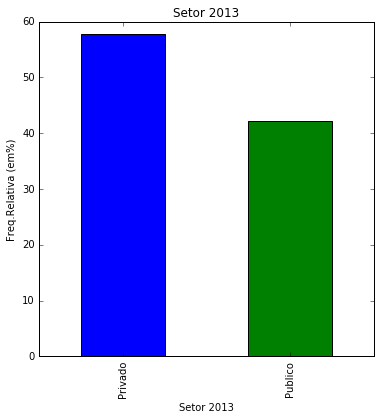

In [7]:
plot = fr_setor2013.plot(kind='bar',title='Setor 2013',figsize=(6, 6),color=('b','g'))
plt.ylabel('Freq.Relativa (em%)')
plt.xlabel('Setor 2013')

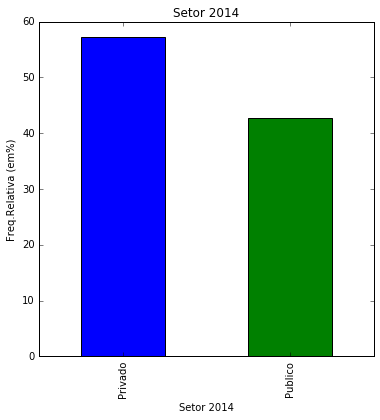

In [8]:
plot = fr_setor2014.plot(kind='bar',title='Setor 2014',figsize=(6, 6),color=('b','g'))
plt.ylabel('Freq.Relativa (em%)')
plt.xlabel('Setor 2014')

### Observação 1:
O setor privado era o setor no qual a maioria dos aposentados trabalhou.

____
# 2. Analisando o sexo em cada setor

In [9]:
# Analisando o sexo em cada setor
dados2013['Sexo'] = pnad2013.V0302
dados2013.Sexo = dados2013.Sexo.astype('category')
dados2013.Sexo.cat.categories = ('Masculino', 'Feminino')

dados2014['Sexo'] = pnad2014.V0302
dados2014.Sexo = dados2014.Sexo.astype('category')
dados2014.Sexo.cat.categories = ('Masculino', "Feminino")

In [10]:
# 2013
setor_sexo2013 = pd.crosstab(dados2013.Setor, dados2013.Sexo, margins = True, rownames = ['Setor'], colnames = ['Sexo'])
setor_sexo2013_rel = (setor_sexo2013/len(dados2013.Setor)*100).round(decimals=1)
print('Tabela de Sexo por Setor em 2013')
setor_sexo2013_rel

Tabela de Sexo por Setor em 2013


Sexo,Masculino,Feminino,All
Setor,,,
Privado,36.9,20.9,57.9
Publico,14.5,27.7,42.1
All,51.4,48.6,100.0


In [11]:
# 2014
setor_sexo2014 = pd.crosstab(dados2014.Setor, dados2014.Sexo, margins = True, rownames = ['Setor'], colnames = ['Sexo'])
setor_sexo2014_rel = (setor_sexo2014/len(dados2014.Setor)*100).round(decimals=1)
print('Tabela de Sexo por Setor em 2014')
setor_sexo2014_rel

Tabela de Sexo por Setor em 2014


Sexo,Masculino,Feminino,All
Setor,,,
Privado,37.7,19.6,57.3
Publico,16.5,26.2,42.7
All,54.2,45.8,100.0


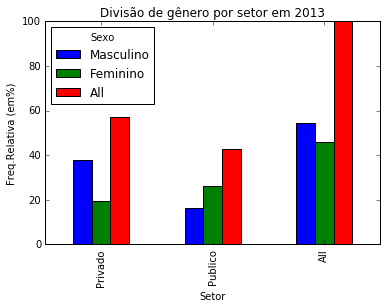

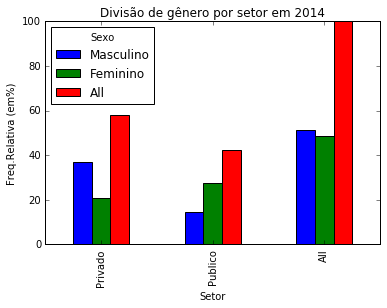

In [12]:
setor_sexo2014_rel.plot(kind = 'bar')
plt.title("Divisão de gênero por setor em 2013")
plt.ylabel('Freq.Relativa (em%)')
setor_sexo2013_rel.plot(kind = 'bar')
plt.title("Divisão de gênero por setor em 2014")
plt.ylabel('Freq.Relativa (em%)')
plt.show()

### Observação 2:
A população de aposentados no setor privado é, com uma margem de folga, predominantemente masculino. Assim como o setor público apresenta uma dominância muito maior de mulheres.

____
# 3. Analisando o rendimento mensal da aposentadoria para cada ano

In [13]:
# Analisando o rendimento mensal da aposentadoria para cada ano
intervalo_rendimento = np.arange(0, 21000, 1000)

dados2013['Rendimento_mensal'] = pnad2013.V4720
dados2014['Rendimento_mensal'] = pnad2014.V4720

rendimento_mensal2013 = pd.cut(dados2013.Rendimento_mensal[(dados2013.Rendimento_mensal <= 21000) & (~dados2013.Rendimento_mensal.isnull())], intervalo_rendimento)
rendimento_mensal2014 = pd.cut(dados2014.Rendimento_mensal[(dados2014.Rendimento_mensal <= 21000)], intervalo_rendimento)

In [14]:
# 2013
setor_rendimento2013 = pd.crosstab(dados2013.Setor, rendimento_mensal2013, margins=True,rownames = ['Setor'], colnames = ['Rendimento_mensal'])
setor_rendimento2013_rel = (setor_rendimento2013/len(dados2013.Setor[(dados2013.Rendimento_mensal != 999999999999) & (~dados2013.Rendimento_mensal.isnull())])*100).round(decimals=1)

In [15]:
# 2014
setor_rendimento2014 = pd.crosstab(dados2014.Setor, rendimento_mensal2014, margins=True,rownames = ['Setor'], colnames = ['Rendimento_mensal'])
setor_rendimento2014_rel = (setor_rendimento2014/len(dados2014.Setor[(dados2014.Rendimento_mensal <= 16000)])*100).round(decimals=1)

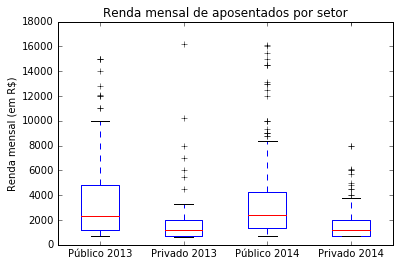

In [33]:
box_rendas = pd.DataFrame([dados2013.Rendimento_mensal[(dados2013.Rendimento_mensal <= 20000) & (~dados2013.Rendimento_mensal.isnull()) & (dados2013.Setor=='Publico')],dados2013.Rendimento_mensal[(dados2013.Rendimento_mensal <= 20000) & (~dados2013.Rendimento_mensal.isnull()) & (dados2013.Setor=='Privado')],dados2014.Rendimento_mensal[(dados2014.Rendimento_mensal <= 20000) & (~dados2014.Rendimento_mensal.isnull()) & (dados2014.Setor=='Publico')],dados2014.Rendimento_mensal[(dados2014.Rendimento_mensal <= 20000) & (~dados2014.Rendimento_mensal.isnull()) & (dados2014.Setor=='Privado')]],index=('Público 2013','Privado 2013','Público 2014','Privado 2014'))
box_rendas = box_rendas.T
box_rendas.plot.box()
plt.ylabel('Renda mensal (em R$)')
plt.title('Renda mensal de aposentados por setor')

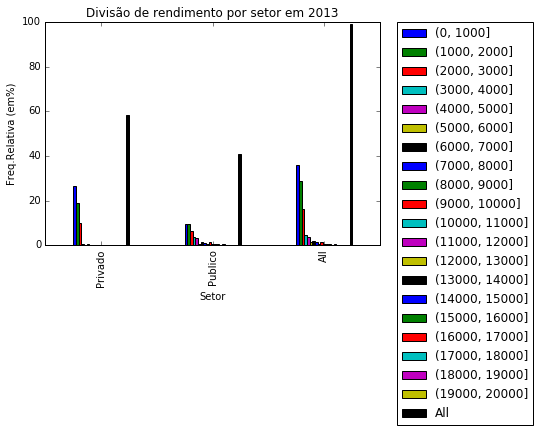

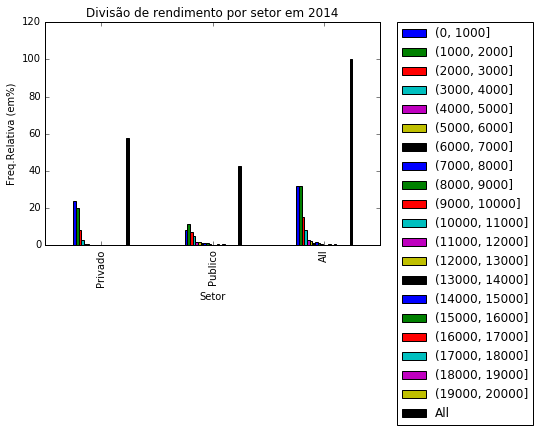

In [17]:
setor_rendimento2013_rel.plot(kind='bar')
plt.title('Divisão de rendimento por setor em 2013')
plt.ylabel('Freq.Relativa (em%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
setor_rendimento2014_rel.plot(kind='bar')
plt.title('Divisão de rendimento por setor em 2014')
plt.ylabel('Freq.Relativa (em%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### Observação 3:
Enquanto a renda mensal dos aposentados que trabalharam no setor privado se concentra nos intervalos mais altos, com pouquíssima presença nos intervalos maiores, a renda dos que trabalharam no setor público é mais distribuída e com mais frequências em rendas maiores.

___
# 4. Analisando a presença de aposentados por Região

In [18]:
# Identificando a região de cada grupo
dados2013['Região'] = pnad2013.UF
dados2013.Região[(pnad2013.UF >= 10) & (pnad2013.UF < 20)] = 1
dados2013.Região[(pnad2013.UF >= 20) & (pnad2013.UF < 30)] = 2
dados2013.Região[(pnad2013.UF >= 30) & (pnad2013.UF < 40)] = 3
dados2013.Região[(pnad2013.UF >= 40) & (pnad2013.UF < 50)] = 4
dados2013.Região[(pnad2013.UF >= 50) & (pnad2013.UF < 60)] = 5

dados2013.Região = dados2013.Região.astype('category')
dados2013.Região.cat.categories = ('Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste')

dados2014['Região'] = pnad2014.UF
dados2014.Região[(pnad2014.UF >= 10) & (pnad2014.UF < 20)] = 1
dados2014.Região[(pnad2014.UF >= 20) & (pnad2014.UF < 30)] = 2
dados2014.Região[(pnad2014.UF >= 30) & (pnad2014.UF < 40)] = 3
dados2014.Região[(pnad2014.UF >= 40) & (pnad2014.UF < 50)] = 4
dados2014.Região[(pnad2014.UF >= 50) & (pnad2014.UF < 60)] = 5

dados2014.Região = dados2014.Região.astype('category')
dados2014.Região.cat.categories = ('Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste')

C:\Users\Leonardo Andrade\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Leonardo Andrade\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Leonardo Andrade\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Leonardo Andrade\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCop

In [19]:
# 2013
setor_região2013 = pd.crosstab(dados2013.Setor, dados2013.Região, margins = True, rownames = ['Setor'], colnames = ['Região'])
setor_região2013_rel = (setor_região2013/len(dados2013.Setor)*100).round(decimals=1)
print('Tabela de Região por Setor em 2013')
setor_região2013_rel

Tabela de Região por Setor em 2013


Região,Norte,Nordeste,Sudeste,Sul,Centro-Oeste,All
Setor,,,,,,
Privado,1.2,10.2,28.9,14.5,3.0,57.9
Publico,3.5,11.0,13.2,8.0,6.5,42.1
All,4.7,21.2,42.1,22.4,9.5,100.0


In [20]:
# 2014
setor_região2014 = pd.crosstab(dados2014.Setor, dados2014.Região, margins = True, rownames = ['Setor'], colnames = ['Região'])
setor_região2014_rel = (setor_região2014/len(dados2014.Setor)*100).round(decimals=1)
print('Tabela de Região por Setor em 2014')
setor_região2014_rel

Tabela de Região por Setor em 2014


Região,Norte,Nordeste,Sudeste,Sul,Centro-Oeste,All
Setor,,,,,,
Privado,3.3,9.1,23.9,17.9,3.1,57.3
Publico,5.4,9.9,14.6,8.7,4.1,42.7
All,8.7,19.0,38.6,26.6,7.2,100.0


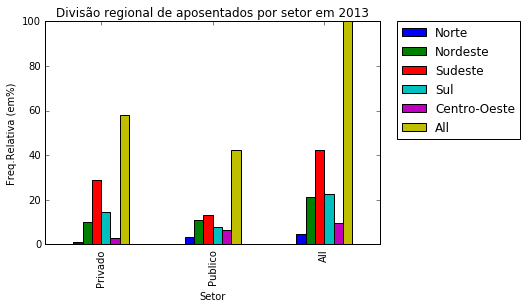

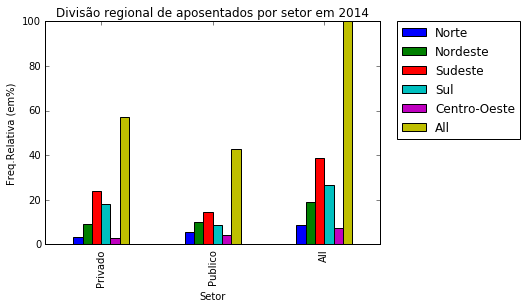

In [21]:
setor_região2013_rel.plot(kind = 'bar')
plt.title("Divisão regional de aposentados por setor em 2013")
plt.ylabel('Freq.Relativa (em%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

setor_região2014_rel.plot(kind = 'bar')
plt.title("Divisão regional de aposentados por setor em 2014")
plt.ylabel('Freq.Relativa (em%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

### Observação 4:
Enquanto no Sul e no Sudeste o setor privado é predominante, nas outras regiões do país a presença no setor plúblico ultrapassa a no setor privado.

___
# 5. Analisando a idade dos aposentados para cada setor

In [22]:
dados2013['Idade'] = pnad2013.V8005
dados2013.Idade = dados2013.Idade.astype('float')

dados2014['Idade'] = pnad2014.V8005
dados2014.Idade = dados2014.Idade.astype('float')

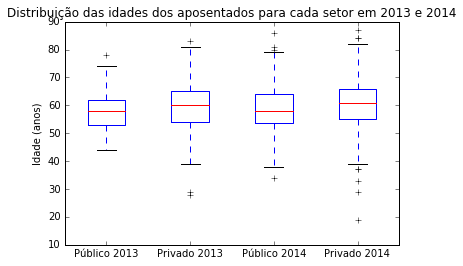

In [34]:
box_idades = pd.DataFrame([dados2013.Idade[dados2013.Setor=='Publico'], dados2013.Idade[dados2013.Setor=='Privado'], dados2014.Idade[dados2014.Setor=='Publico'], dados2014.Idade[dados2014.Setor=='Privado']],index=('Público 2013','Privado 2013','Público 2014','Privado 2014'))
box_idades = box_idades.T
box_idades.plot.box()
plt.title('Distribuição das idades dos aposentados para cada setor em 2013 e 2014')
plt.ylabel('Idade (anos)')

### Observação 5:
Embora tímida a diferença, os aposentados do setor público são, no geral, mais jovens do que os aposentados do setor privado.

___
# 6. Analisando o número de anos no trabalho anterior

In [24]:
# 2013
dados2013['Anos_trabalho_anterior'] = pnad2013.V9861
dados2013.Anos_trabalho_anterior = dados2013.Anos_trabalho_anterior.astype('float') 

# 2014
dados2014['Anos_trabalho_anterior'] = pnad2014.V9861
dados2014.Anos_trabalho_anterior = dados2014.Anos_trabalho_anterior.astype('float') 

intervalo_anos_trabalho = np.arange(0, 50, 2)

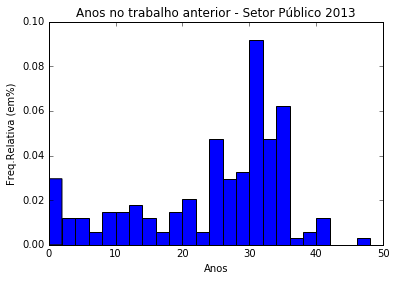

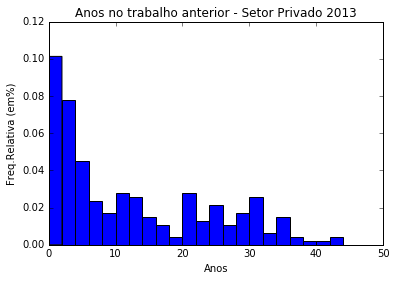

In [35]:
# 2013
dados2013.Anos_trabalho_anterior[dados2013.Setor=='Publico'].plot.hist(bins = intervalo_anos_trabalho, normed=1)
plt.xlabel('Anos')
plt.ylabel('Freq.Relativa (em%)')
plt.title('Anos no trabalho anterior - Setor Público 2013')
plt.show()
dados2013.Anos_trabalho_anterior[dados2013.Setor=='Privado'].plot.hist(bins = intervalo_anos_trabalho, normed=1)
plt.xlabel('Anos')
plt.ylabel('Freq.Relativa (em%)')
plt.title('Anos no trabalho anterior - Setor Privado 2013')
plt.show()

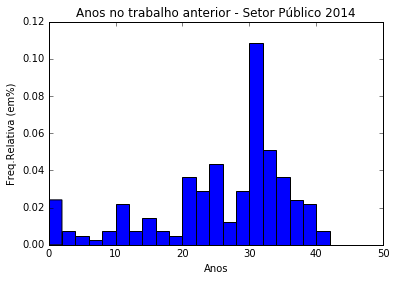

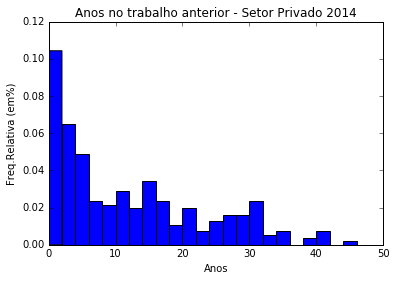

In [36]:
# 2014
dados2014.Anos_trabalho_anterior[dados2014.Setor=='Publico'].plot.hist(bins = intervalo_anos_trabalho, normed=1)
plt.xlabel('Anos')
plt.ylabel('Freq.Relativa (em%)')
plt.title('Anos no trabalho anterior - Setor Público 2014')
plt.show()
dados2014.Anos_trabalho_anterior[dados2014.Setor=='Privado'].plot.hist(bins = intervalo_anos_trabalho, normed=1)
plt.xlabel('Anos')
plt.ylabel('Freq.Relativa (em%)')
plt.title('Anos no trabalho anterior - Setor Privado 2014')
plt.show()

### Observação 6
Aposentados que trabalharam no setor público permaneceram por mais tempo em seus últimos empregos.

___
# 7. Analisando a diferença salarial entre os setores por quantidade de anos no trabalho anterior

Verde = Público
Azul = Privado


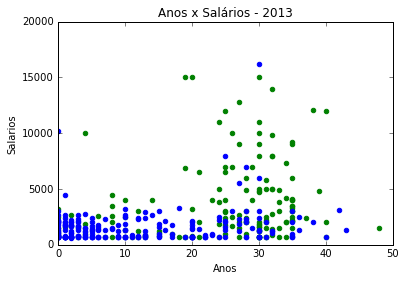

In [38]:
# 2013
plt.scatter(dados2013.Anos_trabalho_anterior[(dados2013.Rendimento_mensal <= 20000) & (~dados2013.Rendimento_mensal.isnull()) & (dados2013.Setor=='Publico')],dados2013.Rendimento_mensal[(dados2013.Rendimento_mensal <= 20000) & (~dados2013.Rendimento_mensal.isnull()) & (dados2013.Setor=='Publico')],color='g')
plt.scatter(dados2013.Anos_trabalho_anterior[(dados2013.Rendimento_mensal <= 20000) & (~dados2013.Rendimento_mensal.isnull()) & (dados2013.Setor=='Privado')],dados2013.Rendimento_mensal[(dados2013.Rendimento_mensal <= 20000) & (~dados2013.Rendimento_mensal.isnull()) & (dados2013.Setor=='Privado')],color='b')
plt.title("Anos x Salários - 2013")
plt.xlabel("Anos")
plt.ylabel("Salarios")
plt.axis([0, 50, 0, 20000])
print('Verde = Público')
print('Azul = Privado')

Verde = Público
Azul = Privado


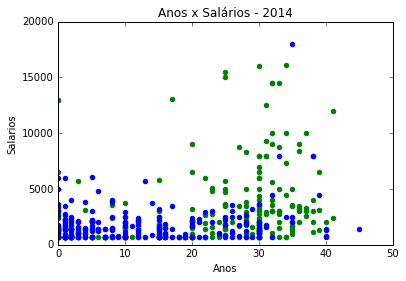

In [39]:
# 2014
plt.scatter(dados2014.Anos_trabalho_anterior[(dados2014.Rendimento_mensal <= 20000) & (~dados2014.Rendimento_mensal.isnull()) & (dados2014.Setor=='Publico')],dados2014.Rendimento_mensal[(dados2014.Rendimento_mensal <= 20000) & (~dados2014.Rendimento_mensal.isnull()) & (dados2014.Setor=='Publico')],color='g')
plt.scatter(dados2014.Anos_trabalho_anterior[(dados2014.Rendimento_mensal <= 20000) & (~dados2014.Rendimento_mensal.isnull()) & (dados2014.Setor=='Privado')],dados2014.Rendimento_mensal[(dados2014.Rendimento_mensal <= 20000) & (~dados2014.Rendimento_mensal.isnull()) & (dados2014.Setor=='Privado')],color='b')
plt.title("Anos x Salários - 2014")
plt.xlabel("Anos")
plt.ylabel("Salarios")
plt.axis([0, 50, 0, 20000])
print('Verde = Público')
print('Azul = Privado')

___
### Observação 7:
A quantidade de anos passados no último emprego parecem afetar com maior intensidade os aposentados do setor Publico

___
# 8. Analisando o nível de ensino dos aposentados

In [29]:
# 2013
dados2013['Educação'] = pnad2013.V4803
dados2013.Educação[(pnad2013.V4803 == 1)] = 0
dados2013.Educação[(pnad2013.V4803 == 2)] = 1
dados2013.Educação[(pnad2013.V4803 == 3)] = 2
dados2013.Educação[(pnad2013.V4803 == 4)] = 3
dados2013.Educação[(pnad2013.V4803 == 5)] = 4
dados2013.Educação[(pnad2013.V4803 == 6)] = 5
dados2013.Educação[(pnad2013.V4803 == 7)] = 6
dados2013.Educação[(pnad2013.V4803 == 8)] = 7
dados2013.Educação[(pnad2013.V4803 == 9)] = 8
dados2013.Educação[(pnad2013.V4803 == 10)] = 9
dados2013.Educação[(pnad2013.V4803 == 11)] = 10
dados2013.Educação[(pnad2013.V4803 == 12)] = 11
dados2013.Educação[(pnad2013.V4803 == 13)] = 12
dados2013.Educação[(pnad2013.V4803 == 14)] = 13
dados2013.Educação[(pnad2013.V4803 == 15)] = 14
dados2013.Educação[(pnad2013.V4803 == 16)] = 15
dados2013.Educação[(pnad2013.V4803 == 17)] = 'Indeterminado'

# 2014
dados2014['Educação'] = pnad2014.V4803
dados2014.Educação[(pnad2014.V4803 == 1)] = 0
dados2014.Educação[(pnad2014.V4803 == 2)] = 1
dados2014.Educação[(pnad2014.V4803 == 3)] = 2
dados2014.Educação[(pnad2014.V4803 == 4)] = 3
dados2014.Educação[(pnad2014.V4803 == 5)] = 4
dados2014.Educação[(pnad2014.V4803 == 6)] = 5
dados2014.Educação[(pnad2014.V4803 == 7)] = 6
dados2014.Educação[(pnad2014.V4803 == 8)] = 7
dados2014.Educação[(pnad2014.V4803 == 9)] = 8
dados2014.Educação[(pnad2014.V4803 == 10)] = 9
dados2014.Educação[(pnad2014.V4803 == 11)] = 10
dados2014.Educação[(pnad2014.V4803 == 12)] = 11
dados2014.Educação[(pnad2014.V4803 == 13)] = 12
dados2014.Educação[(pnad2014.V4803 == 14)] = 13
dados2014.Educação[(pnad2014.V4803 == 15)] = 14
dados2014.Educação[(pnad2014.V4803 == 16)] = 15
dados2014.Educação[(pnad2014.V4803 == 17)] = 'Indeterminado'

C:\Users\Leonardo Andrade\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Leonardo Andrade\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Leonardo Andrade\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Leonardo Andrade\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCop

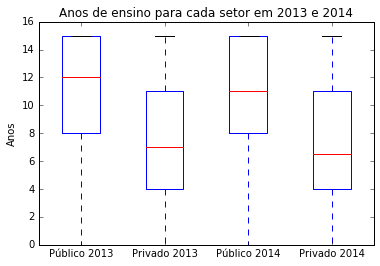

In [37]:
box_educação = pd.DataFrame([dados2013.Educação[(dados2013.Setor=='Publico') & (dados2013.Educação != 'Indeterminado')],dados2013.Educação[(dados2013.Setor=='Privado') & (dados2013.Educação != 'Indeterminado')], dados2014.Educação[(dados2014.Setor=='Publico') & (dados2014.Educação != 'Indeterminado')], dados2014.Educação[(dados2014.Setor=='Privado') & (dados2014.Educação != 'Indeterminado')]],index=('Público 2013','Privado 2013','Público 2014','Privado 2014'))
box_educação = box_educação.T
box_educação.plot.box()
plt.title('Anos de ensino para cada setor em 2013 e 2014')
plt.ylabel('Anos')

### Observação 8:
Os aposentados do setor Publico apresentam melhor escolaridade, o que poderia explicar a diferença salarial entre os dois setores.

___
# 9. Analisando as diferenças salariais entre os setores por ensino

Verde = Público
Azul = Privado


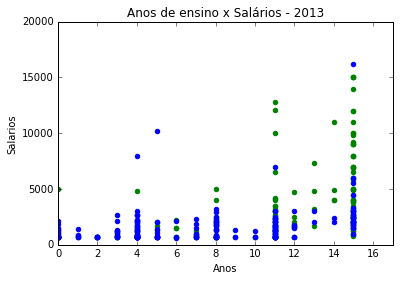

In [40]:
# 2013
plt.scatter(dados2013.Educação[(dados2013.Educação != 'Indeterminado') & (dados2013.Rendimento_mensal <= 20000) & (~dados2013.Rendimento_mensal.isnull()) & (dados2013.Setor=='Publico')],dados2013.Rendimento_mensal[(dados2013.Educação != 'Indeterminado') & (dados2013.Rendimento_mensal <= 20000) & (~dados2013.Rendimento_mensal.isnull()) & (dados2013.Setor=='Publico')],color='g')
plt.scatter(dados2013.Educação[(dados2013.Educação != 'Indeterminado') & (dados2013.Rendimento_mensal <= 20000) & (~dados2013.Rendimento_mensal.isnull()) & (dados2013.Setor=='Privado')],dados2013.Rendimento_mensal[(dados2013.Educação != 'Indeterminado') & (dados2013.Rendimento_mensal <= 20000) & (~dados2013.Rendimento_mensal.isnull()) & (dados2013.Setor=='Privado')],color='b')
plt.title("Anos de ensino x Salários - 2013")
plt.xlabel("Anos")
plt.ylabel("Salarios")
plt.axis([0, 17, 0, 20000])
print('Verde = Público')
print('Azul = Privado')

Verde = Público
Azul = Privado


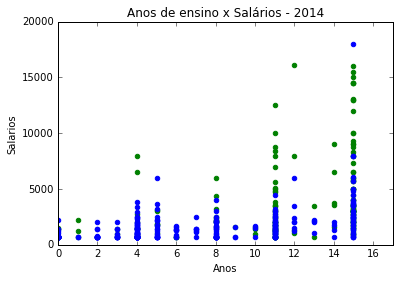

In [41]:
# 2014
plt.scatter(dados2014.Educação[(dados2014.Educação != 'Indeterminado') & (dados2014.Rendimento_mensal <= 20000) & (~dados2014.Rendimento_mensal.isnull()) & (dados2014.Setor=='Publico')],dados2014.Rendimento_mensal[(dados2014.Educação != 'Indeterminado') & (dados2014.Rendimento_mensal <= 20000) & (~dados2014.Rendimento_mensal.isnull()) & (dados2014.Setor=='Publico')],color='g')
plt.scatter(dados2014.Educação[(dados2014.Educação != 'Indeterminado') & (dados2014.Rendimento_mensal <= 20000) & (~dados2014.Rendimento_mensal.isnull()) & (dados2014.Setor=='Privado')],dados2014.Rendimento_mensal[(dados2014.Educação != 'Indeterminado') & (dados2014.Rendimento_mensal <= 20000) & (~dados2014.Rendimento_mensal.isnull()) & (dados2014.Setor=='Privado')],color='b')
plt.title("Anos de ensino x Salários - 2014")
plt.xlabel("Anos")
plt.ylabel("Salarios")
plt.axis([0, 17, 0, 20000])
print('Verde = Público')
print('Azul = Privado')

### Observação 9:
Maior nível de educação parece afetar mais o rendimento de aposentados do setor publico do que do privado.

___
## Conclusão 

   Os aposentados do setor público apresentam-se melhores do que os do setor privado no que diz respeito à renda mensal deles: no geral, a dos que vieram do setor público ultrapassa, com uma boa margem, a dos que vieram do setor privado. Além disso, enquanto a renda do setor público aparenta ser melhor distribuida e mais heterogêneas, a do privado se concentra em valores menores.
   
   Os ex-funcionários públicos também superam o setor privado na idade inferior em que se aposentam. Embora pequena, a diferença é notável, como tratado na Observação 5.
   
   Outro fator que diferencia os dois grupos é o nível de escolaridade: o dos funcionário públicos é, em média, bem superior ao do setor privado, o que poderia ser um dos motivos da diferença salarial existente entre os dois. Entretanto, esta é apenas uma suposição. Não foi possível realizar uma profunda análise do que determina a diferença entre os salários, devido à limitação das variáveis disponíveis para o estudo. Para o aprofundamento, seriam necessárias variáveis que tratassem de forma mais específica o grupo dos aposentados.